In [94]:
from sklearn import metrics
import matplotlib.pyplot as plt


In [95]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Nov 17 15:11:36 2020
@author: bwilliams
"""

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def data_cleaner(df):
    data = df.copy()
    #remove the id, partlybad columns
    data.drop(["id","partlybad"],1,inplace=True)
    #set new index using the date column
    data.set_index(["date"],inplace=True)
    #add binary 'class2' col for event/non-event
    data["class2"] = np.where(data["class4"] == "nonevent", "nonevent","event")
    #arrange to put class2 col at the front
    cols = ['class2'] + [col for col in data if col != 'class2']
    data = data[cols]
    return data

##### New way to generate the data

def data_generator(df):
    '''
    input:
        df: dataframe to split stratified by variable class
        class: string with variable to use as response and as variable to stratify by
    output:
        X_train, y_train: variables and response 60% data 
        X_val, y_val: variables and response 20% data 
        X_trainval, y_trainval: variables and response 80% data (for cross validation)
        X_test, y_test: variables and response 20% data 
    '''
    
    X = df.drop(["class2","class4"], axis=1)
    y = df['class4']

    return X, y


def convert_binary(y):
    '''
    Parameters
    ----------
    y : repsonse variable with 4 classes
    Returns
    -------
    y : reponse variable 2 classes
    '''
    y_bin = np.where(y == "nonevent", "nonevent","event")
    return y_bin

#test with answers
url = "https://raw.githubusercontent.com/williwilliams3/TermProjectIML/master/npf_test.csv"
df = pd.read_csv(url)
df = data_cleaner(df)

X_ans,y_ans = data_generator(df)


# If needed conversion from 4 classes to binary classes
y_ans_bin = convert_binary(y_ans)






In [96]:
url = "https://raw.githubusercontent.com/williwilliams3/TermProjectIML/master/bin/answers.csv"
ans = pd.read_csv(url)
ans.drop(["class4"],0,inplace=True)

ans_class = ans.index
ans_class_bin = convert_binary(ans_class)

ans.head()
probs = ans.iloc[:,0].values


predictions vs reality 0.6787564766839378


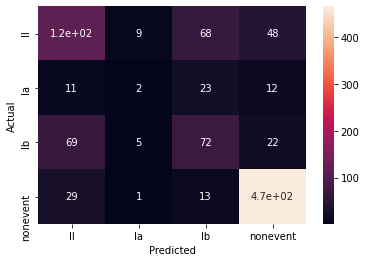

In [97]:
import seaborn as sns

print('predictions vs reality',metrics.accuracy_score(y_ans, ans_class))


confusion_matrix = pd.crosstab(y_ans, ans_class, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)


predictions vs reality 0.8704663212435233


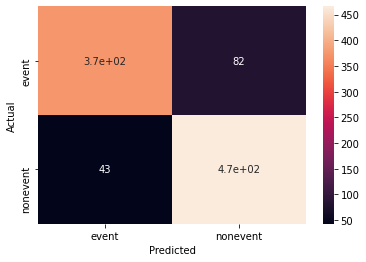

In [98]:

print('predictions vs reality',metrics.accuracy_score(y_ans_bin, ans_class_bin))


confusion_matrix = pd.crosstab(y_ans_bin, ans_class_bin, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
#gives double false negatives



In [99]:
np.std(X_ans)

CO2168.mean    11.061556
CO2168.std      3.374626
CO2336.mean    11.028459
CO2336.std      3.138763
CO242.mean     10.664660
                 ...    
UV_A.std        4.948165
UV_B.mean       0.305897
UV_B.std        0.278218
CS.mean         0.002182
CS.std          0.000635
Length: 100, dtype: float64

In [100]:
covMatrix = np.cov(X_ans,bias=True)


In [101]:
print(covMatrix)


[[25638.09744345 22049.16326495 20619.18032882 ... 22625.77072505
  23430.73493787 21977.817794  ]
 [22049.16326495 22285.79974515 21055.63615377 ... 22527.26274872
  22402.01893113 21844.45422195]
 [20619.18032882 21055.63615377 20324.27436545 ... 21331.01159635
  21119.7288631  20839.51027482]
 ...
 [22625.77072505 22527.26274872 21331.01159635 ... 22837.13473116
  22784.44317428 22153.68083167]
 [23430.73493787 22402.01893113 21119.7288631  ... 22784.44317428
  23011.66137974 22111.7560563 ]
 [21977.817794   21844.45422195 20839.51027482 ... 22153.68083167
  22111.7560563  21599.76037234]]


In [112]:
#visualise what we got wrong
import statistics

ans_data = pd.DataFrame(np.c_[df,ans.index])


cols = [102] + [col for col in ans_data if col != 102]
ans_data = ans_data[cols]

correct = ans_data[ans_data[102]==ans_data[1]]
wrong = ans_data[ans_data[102]!=ans_data[1]]

df_correct = pd.DataFrame(correct)

corr = df_correct.corr()


df_correct.head()

,102,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101
2,nonevent,nonevent,nonevent,380.339,0.928028,380.316,0.917636,380.55,0.936683,380.301,0.91697,8.28396,5.10789,6.54333,0.191992,6.49714,0.197768,6.62917,0.184255,6.47964,0.198681,6.52819,0.204993,6.59214,0.18152,11.4198,4.87563,0.00952381,0.0261555,0.0075,0.0270597,0.0138095,0.0270611,0.0110843,0.0275421,0.00698795,0.0230976,0.0114286,0.0263042,0.945,...,18.1282,11.5743,0,0,0.0651394,0.646427,92.8532,0.804013,93.4152,0.760399,93.5468,0.760492,93.6681,0.758113,95.5443,1.35664,93.3345,0.738239,0.0286853,0.212517,0.112143,0.100697,770.735,142.421,1.70566,0.363461,1.79064,0.364509,1.45329,0.372461,1.28498,0.379219,1.73785,0.365878,0.720849,0.427279,0.0151789,0.0104708,0.00233441,0.00034727
3,Ib,event,Ib,381.048,1.29008,381.231,1.24549,381.359,1.81787,381.29,1.22828,380.881,280.915,4.66885,0.49171,4.61414,0.502501,4.77759,0.47176,4.58425,0.504107,4.5754,0.506836,4.7078,0.477075,258.773,255.404,0.023046,0.055061,0.0290805,0.0573929,0.0181609,0.0442413,0.0286782,0.0573901,0.0308046,0.104026,0.0151445,0.0468869,1.00948,...,737.638,552.084,-0.0047651,0.0110494,44.5199,29.0392,37.3202,14.0726,37.7652,14.3812,38.1711,14.5468,37.941,14.4791,38.4721,14.6674,37.3837,14.0935,25.1161,18.4697,0.0824138,0.0911261,921.095,0.777319,11.0507,3.357,11.1246,3.594,10.5537,3.30607,10.2983,3.2811,11.1486,3.47868,19.5687,14.4805,0.783038,0.703191,0.00186788,0.000593644
5,Ib,event,Ib,381.804,0.174819,381.8,0.167803,382.015,0.254768,381.778,0.173315,214.705,144.341,2.51944,0.138806,2.50194,0.141675,2.55459,0.121293,2.49706,0.143948,2.50018,0.148149,2.52073,0.132621,111.996,108.702,0.0346296,0.0439929,0.0300926,0.0451683,0.0201835,0.045704,0.0319266,0.0442317,0.0285321,0.0401116,0.022844,0.0388037,0.854815,...,400.098,270.378,-0.00542945,0.00534232,43.7497,27.5488,64.0053,14.9859,65.4614,15.2841,64.158,14.0696,65.9546,15.4175,67.5141,15.8044,63.1693,14.8049,35.4605,23.6056,0.097037,0.107888,930.386,2.33493,-5.70097,2.36304,-5.57641,2.28909,-6.22008,2.32836,-6.48417,2.32461,-5.48893,2.39159,10.6256,6.67635,0.243887,0.182965,0.0014845,0.000132264
6,II,event,II,381.466,7.37622,381.328,6.67793,383.152,9.31825,380.875,5.53068,390.747,264.913,10.4256,0.737732,10.3128,0.733606,10.6101,0.743003,10.238,0.734728,10.1985,0.731787,10.5541,0.736867,246.351,245.872,0.0182383,0.0640638,0.00984456,0.0726398,0.0260622,0.0879277,0.0106736,0.0623754,0.0132474,0.0703674,-0.00305699,0.0686437,0.341615,...,806.749,533.989,0.000198447,0.0166404,51.227,28.5813,40.711,11.2544,40.7196,10.8477,41.5855,12.4829,40.4798,10.3515,40.7533,10.0055,41.1498,12.1406,26.0689,16.2899,0.282642,0.12423,915.961,0.637461,22.0479,3.47492,22.1228,3.96014,21.7549,3.11051,21.5466,2.97303,22.1619,3.84099,22.2811,15.6367,1.07732,0.93635,0.00573921,0.000615564
7,II,event,II,368.388,5.32384,367.802,4.40871,369.788,7.02958,367.515,4.00715,195.884,158.995,9.50371,1.55821,9.32769,1.43082,9.73643,1.64553,9.22166,1.36976,9.17489,1.35545,9.6459,1.62581,136.184,124.508,0.039214,0.0635796,0.0361572,0.0627309,0.0387826,0.103588,0.0327074,0.0637952,0.0355022,0.0581463,0.03131,0.0545398,1.44135,...,371.031,305.407,0.00121291,0.0136971,21.8445,18.1704,70.3155,15.6288,68.9405,13.4099,71.2404,17.6519,68.4005,12.3128,69.3382,12.0227,70.6184,17.0474,12.5531,10.3572,0.51786,0.671101,893.263,117.151,11.4084,2.18084,11.6808,2.59214,11.2645,1.86002,10.9647,1.7724,11.6236,2.41078,11.6957,9.17349,0.425933,0.400514,0.0050785,0.00365834


In [110]:
print(corr)

Empty DataFrame
Columns: []
Index: []
